In [1]:
import pandas as pd
df = pd.read_csv('student_scores.csv')
#first we read the files
df.head()
#this displays the first 5

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [2]:
df.info()
df.isna().sum()
#giving us information about the data types non-null count, the column names.
#displays the number of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


,0
Hours,0
Scores,0


In [3]:
df.describe()
#giving some statistical view of the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


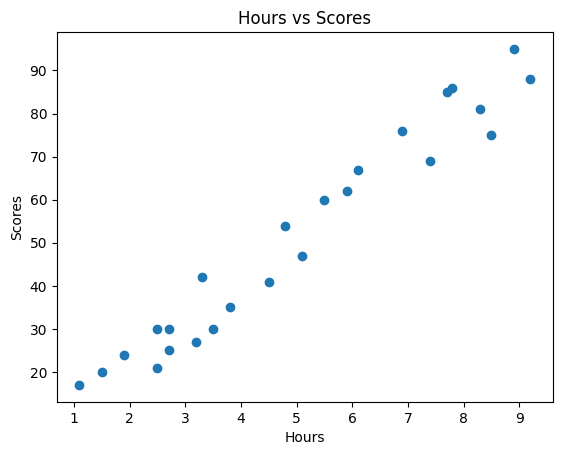

In [27]:
import matplotlib.pyplot as plt
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.show()
#we plot the hours to scores to se if there's a pattren

In [5]:
from sklearn.model_selection import train_test_split
X=df[['Hours']]
y=df['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


we import train test split to split the data to train and test based on the test_size 0.2 means 20% of the data will be tested and it is considred as the unseen data since the model won't train on it the rest 80% of the data would go to training so the model could recognize a pattren. and X will be the input that we are basing our prediction on we will do double brackets since the sklearn expects a 2d on a single feature(input), and y in this case the thing we want to predict will do it regulary. the random state could any integer the 42 is considered the usual although it woun't differ at all.

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
#this will try to fit a linear line based on the prediction using the sent parameters x_train and y_train which make up 80% of the data

LinearRegression()

In [7]:
y_pred = model.predict(X_test)
#here the model predicts the y_test (which is the model haven't seen) based on x_test which are the 20% left

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
#here we test how good of a prediction the model did based on the MSE and R2 metrics scores we send y_test(the actual value) and y_pred(which we just predicted)
#the lower the mse the better(never negative), the higher the r2 the better(0 to 1 some cases negative if it was really bad)

MSE: 18.943211722315272
R2 Score: 0.9678055545167994


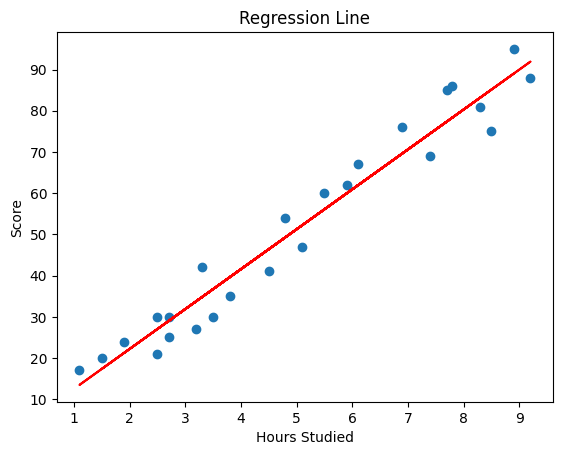

In [9]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()
#plot it to see the models prediction line

In [10]:
model.predict([[9.25]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92.38611528])

In [11]:
model.predict([[4.5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([46.39624405])

above I tried some numbers to test it a bit

In [12]:
r=df[['Hours']]
f=df['Scores']
r_train, r_test, f_train, f_test = train_test_split(r, f, test_size=0.3, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(r_train, f_train)

LinearRegression()

In [14]:
f_pred = model2.predict(r_test)

In [15]:
print("MSE:", mean_squared_error(f_test, f_pred))
print("R2 Score:", r2_score(f_test, f_pred))

MSE: 23.61945761415174
R2 Score: 0.9487647340257012


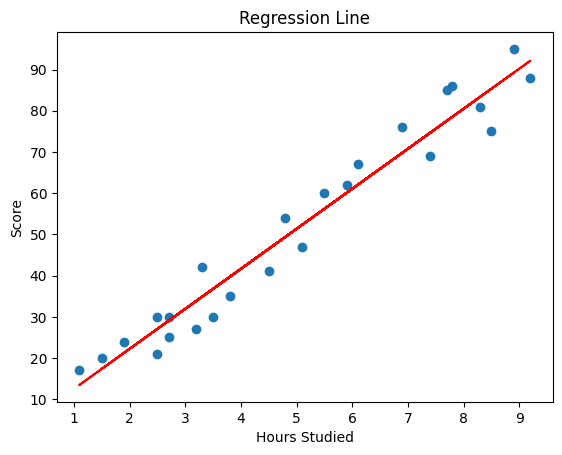

In [16]:
plt.scatter(r, f)
plt.plot(r, model2.predict(r), color='red')
plt.title('Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [17]:
model2.predict([[9.25]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92.61670034])

In [18]:
model2.predict([[4.5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([46.49163089])

above i tried to change the test and train ratio to 30% test and 70% train

In [19]:
fd2=pd.read_csv('student_scorminu.csv')
fd2.head()
#here i changed the files data added a new anamoly to see how the model will behave

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


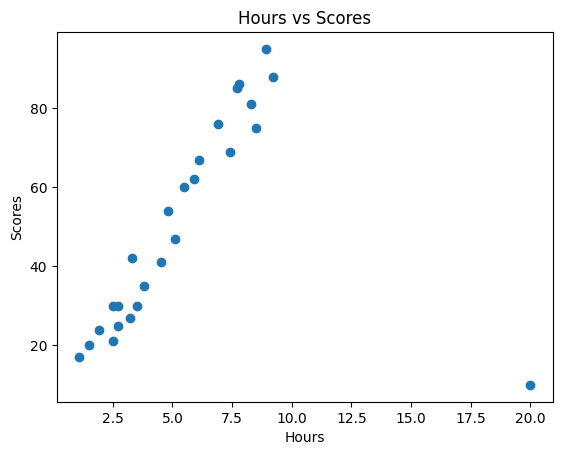

In [20]:
plt.scatter(fd2['Hours'],fd2['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.show()

In [21]:
k = fd2[['Hours']]
l = fd2['Scores']
k_train, k_test, l_train, l_test = train_test_split(k, l, test_size=0.2, random_state=42)

In [22]:
model3 = LinearRegression()
model3.fit(k_train, l_train)

LinearRegression()

In [23]:
l_pred= model3.predict(k_test)

In [24]:
print("MSE:", mean_squared_error(l_test, l_pred))
print("R2 Score:", r2_score(l_test, l_pred))

MSE: 528.2783670214459
R2 Score: 0.256440504641981


the value indicates a really poor prediction

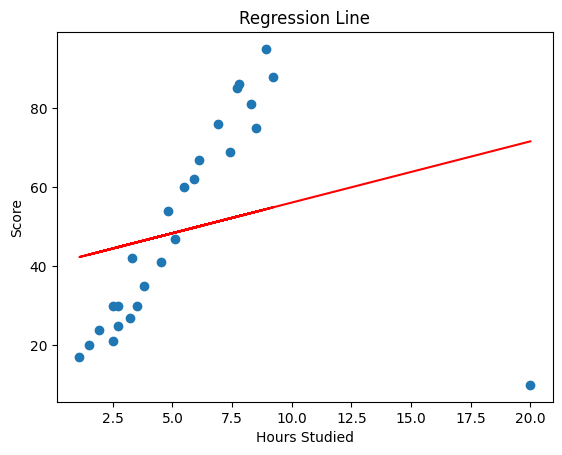

In [25]:
plt.scatter(k, l)
plt.plot(k, model3.predict(k), color='red')
plt.title('Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [ ]:
#this shows the models weakness as one anamoly changed its behaviour completly, this indicates a line is not really good especially for big data sets since it becomes more complicated